# EEG Analysis

ใน tutorial นี้เราจะมาประยุกต์ใช้ supervised machine learning กับงานวิจัยทางด้านสมอง งานวิจัยชิ้นนี้ชื่อว่า "Mental Emotional Sentiment Classification with an EEG-based Brain-machine Interface" [1] เป็นการศึกษาเกี่ยวกับ การจัดหมวดหมู่อารมณ์ของมนุษย์โดยใช้ข้อมูลจาก EEG (Electroencephalography) ซึ่งเป็นเทคนิคในการตรวจการทำงานของเซลล์สมอง ด้วยการบันทึกสัญญาณของเซลล์สมองที่ส่งออกมาในลักษณะของคลื่นไฟฟ้าบริเวณรอบๆหนังศีรษะ  งานวิจัยนี้รวบรวมข้อมูลสัญญาณ EEG จากอาสาสมัครชาย 1 ท่าน และหญิง 1 ท่าน หลังจากที่ได้รับชมภาพยนตร์หรือวิดีโอจำนวน 6 เรื่อง (positive 3 เรื่อง และ negative 3 เรื่อง) รายละเอียดแสดงในตารางด้านล่าง หลังจากนั้นข้อมูลที่เก็บรวบรวมจะถูกนำไปวิเคราะห์และจัดหมวดหมู่เพื่อประมวลผลความรู้สึกหรืออารมณ์ที่เกิดขึ้น


ตาราง แสดงแหล่งที่มาของคลิปภาพยนตร์ที่ใช้เป็นสิ่งกระตุ้นสำหรับการเก็บข้อมูลสมองด้วย EEG
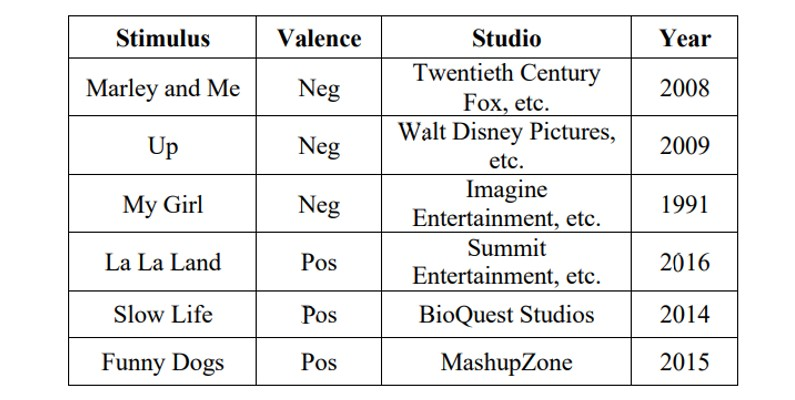

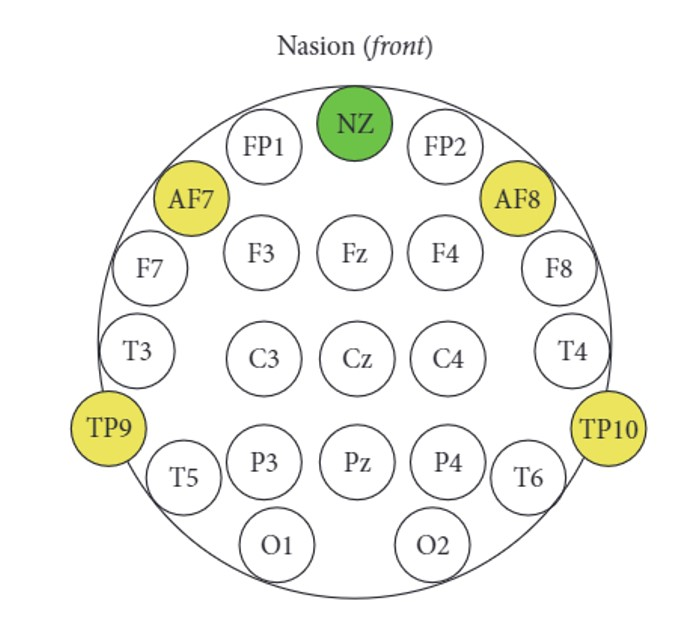

รูปแสดงตำแหน่ง EEG sensors ที่บริเวณต่างๆ บนศีรษะ ได้แก่ TP7, AF8, AF9, TP10 และ NZ เพื่อเก็บข้อมูล brain wave activity ในลักษณะสัญญาณ EEG โดย NZ (จุดสีเขียว) เป็นตำแหน่งอ้างอิงเพื่อสอบเทียบ (calibrate) สัญญาณที่วัดได้ในแต่ละครั้ง [3]

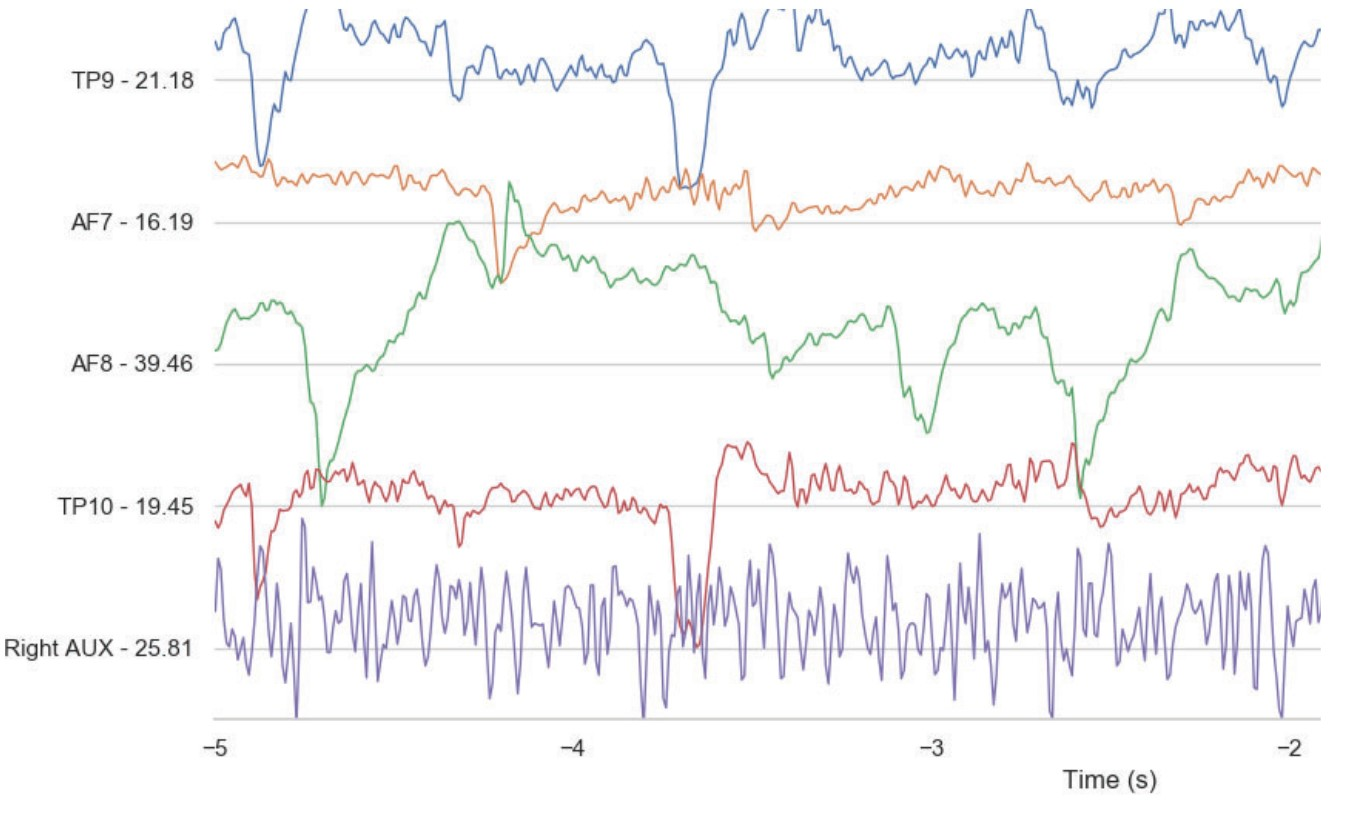

รูปแสดงตัวอย่างของสัญญาณ EEG ที่วัดได้จาก EEG sensors ทั้งสี่ตำแหน่ง กราฟสัญญาณ EEG เหล่านี้ เป็นการวัดค่า voltage เมื่อเวลาผ่านไป โดยแกน Y มีหน่วยเป็น mV ที่วัดได้จาก sensors และแกน X แสดงเวลาในหน่วยวินาที (s) ทั้งนี้ Right AUX เป็นสัญญาณ noise ของอุปกรณ์ที่ไม่ได้เชื่อมต่อกับ sensors [3]

*เอกสารอ้างอิง*

[1] https://www.researchgate.net/publication/329403546_Mental_Emotional_Sentiment_Classification_with_an_EEG-based_Brain-machine_Interface

[2] https://www.researchgate.net/publication/335173767_A_Deep_Evolutionary_Approach_to_Bioinspired_Classifier_Optimisation_for_Brain-Machine_Interaction

[3] J. J. Bird, L. J. Manso, E. P. Ribeiro, A. Ekárt and D. R. Faria, "A Study on Mental State Classification using EEG-based Brain-Machine Interface," 2018 International Conference on Intelligent Systems (IS), Funchal, Portugal, 2018, pp. 795-800, doi: 10.1109/IS.2018.8710576. [pdf](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8710576&casa_token=geU181rfs_YAAAAA:qQddTaw0cFPqwziTv8DA3KkP4gUgT4aPsuS08U2RkGJ0JAmu3d4goZgeG64l5j9szPr6QGducA)

*ตัวอย่างเพิ่มเติม*

https://www.kaggle.com/code/arkhanzada/eeg-brain-signals-emotion-classification

# Supervised learning with EEG brainwave

Dataset: [EEG Brainwave Dataset: Feeling Emotions](https://www.kaggle.com/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions?resource=download)


เริ่มต้นด้วยการ mount Google Drive ที่ได้ download ข้อมูลมาเก็บไว้ และ import library ที่ต้องใช้

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # data visulization
sns.set_theme(style="ticks")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ตั้งค่า random seed สำหรับการทำซ้ำ (reproducibility)
RANDOM_SEED = 2566

เราจะเชื่อมต่อ Google Colab เข้ากับ Google Drive ด้วยคำสั่งข้างล่าง โดยตำแหน่ง folder จะอยู่ที่ /content/drive/MyDrive
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ทำความเข้าใจชุดข้อมูล และเตรียมข้อมูล

In [3]:
# อ่านชุดข้อมูลจากไฟลล์
data = pd.read_csv('/content/drive/MyDrive/data/emotions.csv')

# แสดงข้อมูล 5 แถวแรกของชุดข้อมูล
data.head()

,mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:
# ตรวจสอบขนาดของ dataset
data_dim = data.shape
print('No. of data n_rows:', data_dim[0])
print('No. of data columns:', data_dim[1])

# แสดงชื่อของ columns
print(list(data.columns))

No. of data n_rows: 2132
No. of data columns: 2549
['mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a', 'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a', 'mean_d_0_a2', 'mean_d_1_a2', 'mean_d_2_a2', 'mean_d_3_a2', 'mean_d_4_a2', 'mean_d_5_a', 'mean_d_6_a', 'mean_d_7_a', 'mean_d_8_a', 'mean_d_9_a', 'mean_d_10_a', 'mean_d_11_a', 'mean_d_12_a', 'mean_d_13_a', 'mean_d_14_a', 'mean_d_15_a', 'mean_d_16_a', 'mean_d_17_a', 'mean_d_18_a', 'mean_d_19_a', 'mean_d_20_a', 'mean_d_21_a', 'mean_d_22_a', 'mean_d_23_a', 'mean_d_24_a', 'mean_d_25_a', 'mean_d_26_a', 'mean_d_27_a', 'mean_d_28_a', 'mean_d_29_a', 'mean_d_30_a', 'mean_d_31_a', 'mean_d_32_a', 'mean_d_33_a', 'mean_d_34_a', 'mean_d_35_a', 'mean_d_36_a', 'mean_d_37_a', 'mean_d_38_a', 'mean_d_39_a', 'mean_d_40_a', 'mean_d_41_a', 'mean_d_42_a', 'mean_d_43_a', 'mean_d_44_a', 'mean_d_45_a', 'mean_d_46_a', 'mean_d_47_a', 'mean_d_48_a', 'mean_d_49_a', 'stddev_0_a', 'stddev_1_a', 'stddev_2_a', 'stddev_3_a', 'stddev_4_a', 'st

## Feature Extraction

เนื่องจากสัญญาณ EEG เป็นสัญญาณที่ซับซ้อนและมีการเปลี่ยนแปลงตลอดเวลา ถ้าเราใช้ข้อมูลสัญญาณ EEG ในการวิเคราะห์โดยตรงอาจทำให้เกิดปัญหาของขนาดข้อมูลที่ใหญ่เกินไป และยังมีความซับซ้อนในการตรวจหาคุณลักษณะที่สนใจอีกด้วย ดังนั้น การทำ Feature extraction จะช่วยให้เราสามารถสกัดคุณลักษณะที่สำคัญและเป็นตัวแทนของสัญญาณ EEG ได้ และลดขนาดข้อมูล EEG ลง เพื่อให้การวิเคราะห์เป็นไปได้ง่ายและเร็วขึ้น นอกจากนี้ กระบวนการ feature extraction ของสัญญาณ EEG มักมีการแบ่งช่วงเวลา หรือ ช่วงความถี่ของสัญญาณ ช่วยให้เราสามารถจัดเรียงข้อมูลให้มีลำดับเพื่อให้ง่ายต่อการวิเคราะห์ความสัมพันธ์ระหว่างข้อมูล

ชุดข้อมูลนี้ จึงประกอบด้วย features ที่มาจากการทำ feature extraction ของสัญญาณ EEG ได้แก่
1. Statistical features ที่มาจากการคำนวณค่าทางสถิติของสัญญาณ
2. Max, min and derivartive features ที่มาจากการหาค่าสูงสุด ค่าต่ำสุด และคำนวณค่า derivative ของสัญญาณ
3. Log-covariance features ที่มาจากการคำนวณค่า Log-covariance ของสัญญาณ
4. Entropy-based features ที่คำนวณจาก Shannon entropy และ low-energy entropy
5. Frequency-based features ที่เป็นการแปลสัญญาณ EGG จาก time domain มาเป็น frequency domain ด้วย Fast Fourier Transform (FFT)

สามารถศึกษาเพิ่มเติมได้จากบทความ [3]

## Target Label
คอลัมม์สุดท้ายของข้อมูล คือ 'label' เป็นข้อมูล class ของการทดลองนี้ โดยมีการเก็บข้อมูลอารมณ์ใน 3 คลาส ได้แก่
1. 'NEGATIVE'
2. 'NEUTRAL'
3. 'POSITIVE'

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

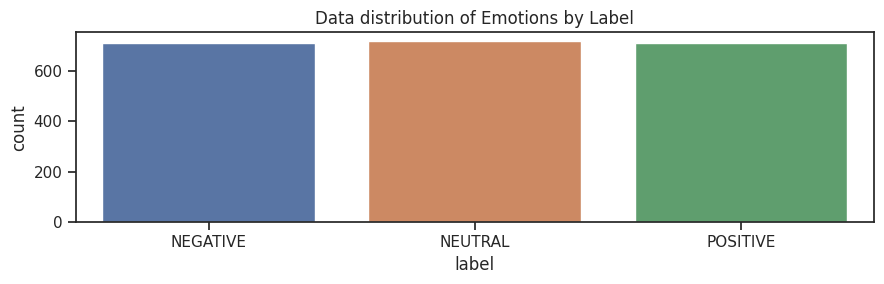

In [5]:
# นับจำนวนข้อมูลของแต่ละค่าใน label
display(data['label'].value_counts())

# plot distribution
plt.figure(figsize=(9,3))
plt.title("Data distribution of Emotions by Label")
sns.countplot(data=data, x='label')
plt.tight_layout()
plt.show()

พบว่า จำนวนข้อมูลในแต่ละกลุ่มมีความใกล้เคียงกัน ชุดข้อมูลนี้จึงถือว่าเป็น balanced datatset

## Feature Visualization: Fast Fourier Transform of EEG Signals

เราจะลองแสดง frequency based features ของสัญญาณ EEG ในข้อมูลชุดนี้ โดยจะเลือกเฉพาะ features ที่มีชื่อขึ้นต้นด้วย  'fft_..' ได้แก่

In [6]:
fft_data = data.loc[:,'fft_0_b':'fft_749_b'].copy()
fft_data.shape

(2132, 750)

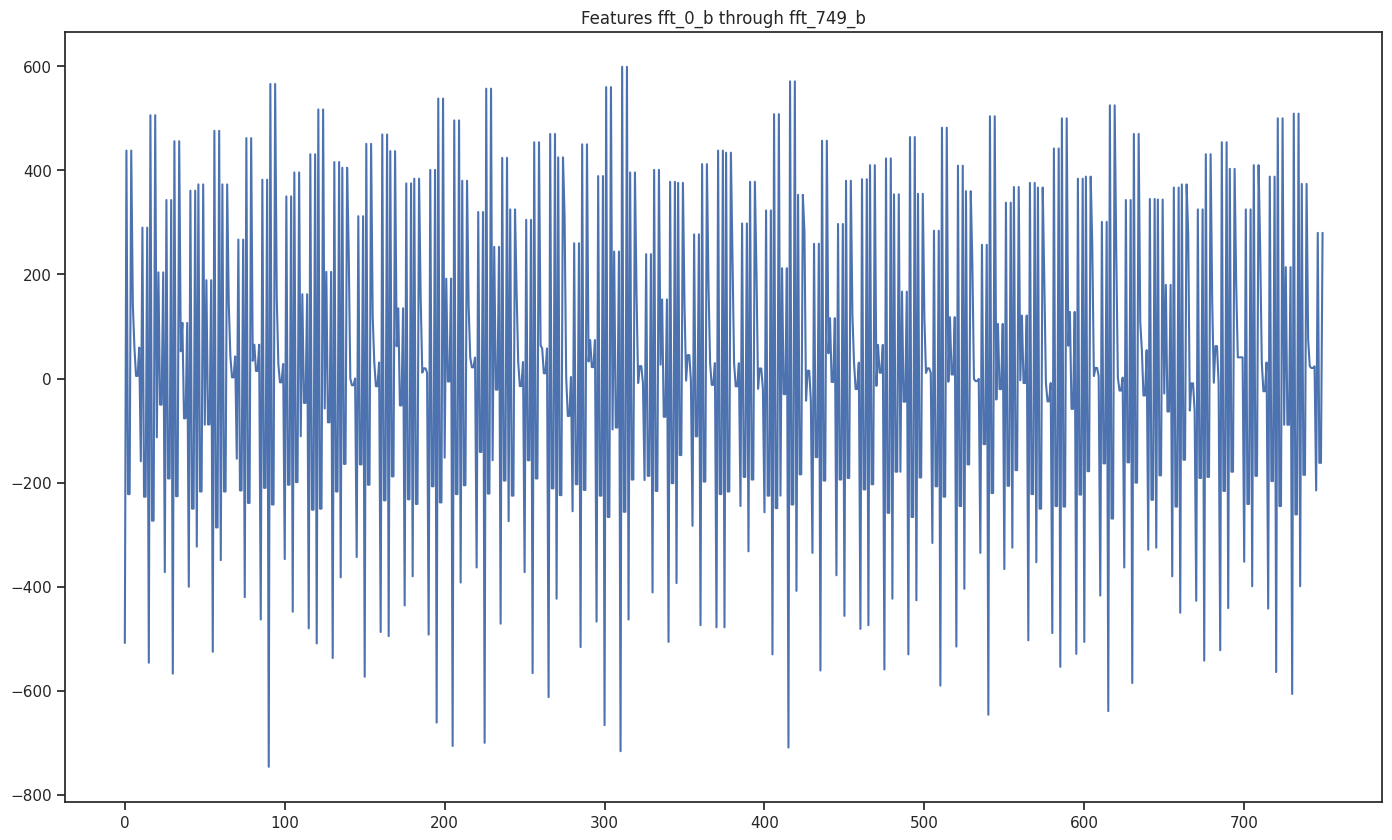

In [7]:
sample_data = fft_data.loc[0,:]

plt.figure(figsize=(17, 10))
plt.plot(range(len(sample_data)), sample_data)
plt.title('Features fft_0_b through fft_749_b')
plt.show()

แสดงลักษณะ FFT features จาก 1 ตัวอย่าง

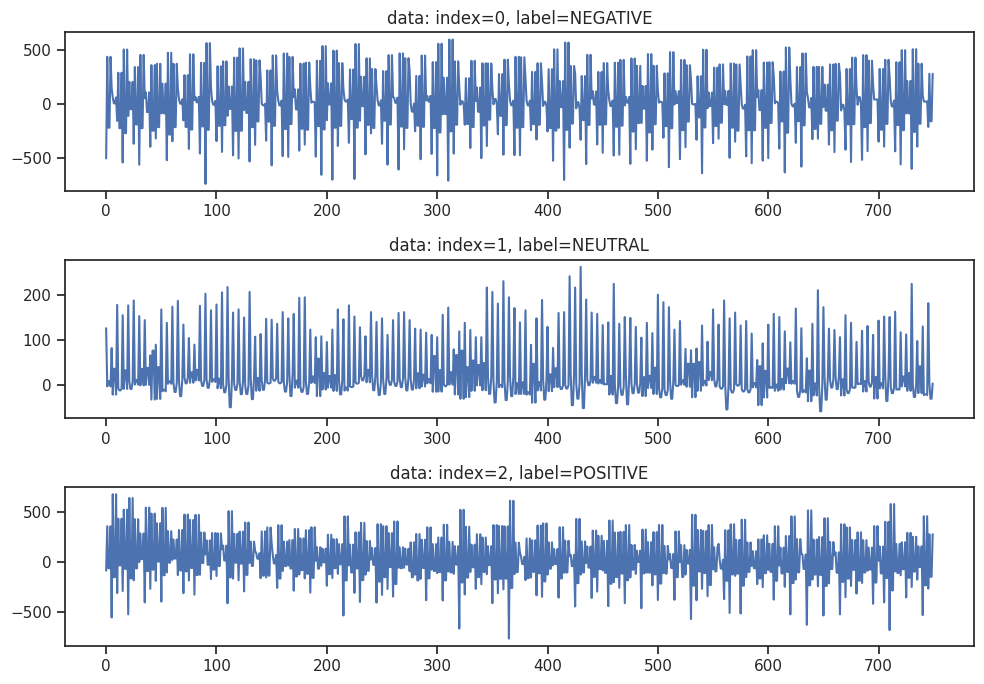

In [8]:
fig, axs = plt.subplots(3, figsize=(10, 7))
ind=0;  sample_data = fft_data.loc[ind,:]
axs[0].plot(range(len(sample_data)), sample_data)
axs[0].set_title('data: index={}, label={}'.format(ind, data['label'][ind]))
ind=1;  sample_data = fft_data.loc[ind,:]
axs[1].plot(range(len(sample_data)), sample_data)
axs[1].set_title('data: index={}, label={}'.format(ind, data['label'][ind]))
ind=2;  sample_data = fft_data.loc[ind,:]
axs[2].plot(range(len(sample_data)), sample_data)
axs[2].set_title('data: index={}, label={}'.format(ind, data['label'][ind]))
plt.tight_layout()
plt.show()

เมื่อเปรียบเทียบ FFT features จาก 3 ตัวอย่างที่มี label ที่ต่างกัน พบว่า FFT features ของ 'NEUTRAL' มีขนาด amplitude ที่ต่างจากคลาสอื่นอย่างเห็นได้ชัด

ต่อไปเราจะลองเปรียบเทียบ FFT features ของแต่ละ label จากตัวอย่างทั้งหมดของชุดข้อมูล โดยใช้ค่าเฉลี่ยเป็นตัวแทนในแต่ละ label ซึ่งยังคงพบความแตกต่างอย่างชัดเจน

In [9]:
#Separating Positive, Neagtive and Neutral dataframes for plotting
neg_fft_data = fft_data.loc[data['label']=='NEGATIVE']
neg_fft_mean = neg_fft_data.mean(axis=0)
neu_fft_data = fft_data.loc[data['label']=='NEUTRAL']
neu_fft_mean = neu_fft_data.mean(axis=0)
pos_fft_data = fft_data.loc[data['label']=='POSITIVE']
pos_fft_mean = pos_fft_data.mean(axis=0)

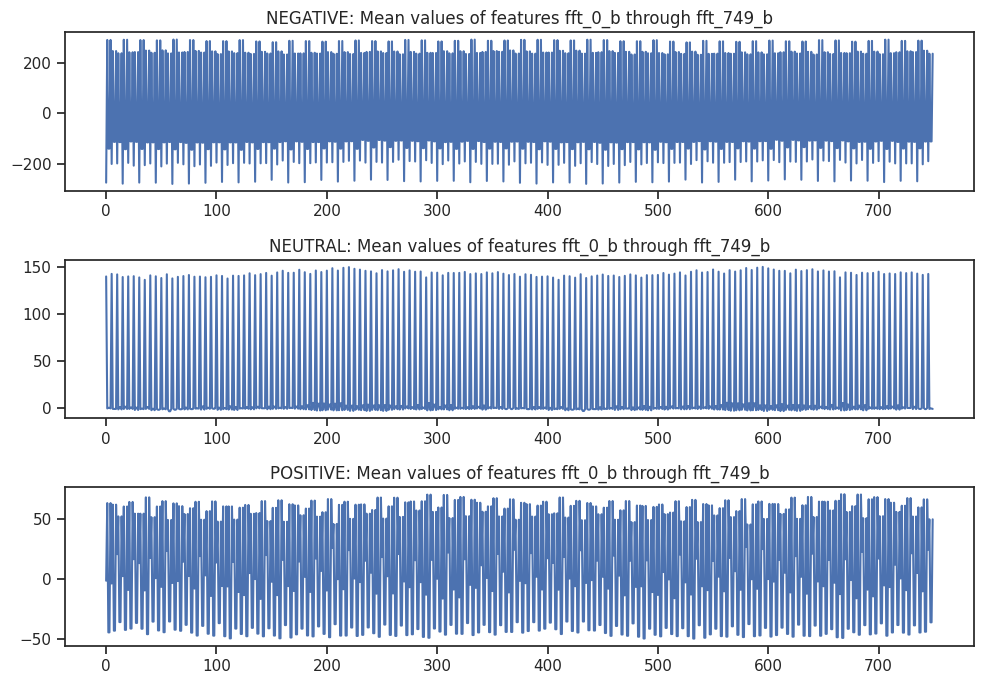

In [10]:
fig, axs = plt.subplots(3, figsize=(10, 7))
axs[0].plot(range(len(neg_fft_mean)), neg_fft_mean)
axs[0].set_title('NEGATIVE: Mean values of features fft_0_b through fft_749_b')
axs[1].plot(range(len(neu_fft_mean)), neu_fft_mean)
axs[1].set_title('NEUTRAL: Mean values of features fft_0_b through fft_749_b')
axs[2].plot(range(len(pos_fft_mean)), pos_fft_mean)
axs[2].set_title('POSITIVE: Mean values of features fft_0_b through fft_749_b')
plt.tight_layout()
plt.show()

# Supervised Machine Learning

## แยกตัวแปร features (x) กับ target label (y) ออกจากกัน

target label คือคอลัมน์สุดท้าย ที่เป็น 'label' ของอารมณ์

In [11]:
x = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()

# แสดงข้อมูล 5 แถวแรกของชุดข้อมูล
display(x.head(5))
display(y.head(5))

,mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


0    NEGATIVE
1     NEUTRAL
2    POSITIVE
3    POSITIVE
4     NEUTRAL
Name: label, dtype: object

In [12]:
# แปลงข้อมูล y ทีมีลักษณะ categorical ให้เป็นตัวเลข
target_labels = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
y = y.map({'NEGATIVE':0, 'NEUTRAL':1, 'POSITIVE':2})
y.head(5)

0    0
1    1
2    2
3    2
4    1
Name: label, dtype: int64

## แบ่งข้อมูลเป็น train-test และ cross-validation
โดยกำกับการแบ่งตามสัดส่วนคลาสของคำตอบ (stratification)

In [13]:
# สร้าง training data และ test data โดยแบ่งจากชุดข้อมูล x,y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=RANDOM_SEED)

print('Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

print('Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[[  0 566]
 [  1 573]
 [  2 566]]
Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[[  0 142]
 [  1 143]
 [  2 142]]


## ทำการ standardize ข้อมูลทั้งหมด
ใช้ mean และ SD จาก training set ในการ standardize test set เพื่อป้องกัน information leak

In [14]:
x_scaler = StandardScaler().fit(x_train)

x_train = x_scaler.transform(x_train)
x_test  = x_scaler.transform(x_test)

## ปรับแต่งโมเดล ด้วย GridSearchCV และ train โมเดล

define function สำหรับ tune, train และ test model

In [15]:
def tune_train_test_pipeline(base_clf, clf_params, x_train, y_train, x_test, y_test):
    # แบ่งข้อมูล training data ด้วย 5-fold cross-validation เพื่อ tune hyperparameter
    # โดยกำกับการแบ่งตามสัดส่วนคลาสของคำตอบ (stratification)
    cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

    # ใช้ GridSearchCV เพื่อสอนโมเดลจากชุดค่า hyperparameters จาก clf_params
    # และคำนวณค่า accuracy ของแต่ละโมเดล เพื่อเลือกชุด hyperparameters ที่ดีที่สุด
    # โดยใช้เทคนิค cross-validation ในการแบ่งกลุ่ม validation data จาก training data
    tuned_clf = GridSearchCV(estimator=base_clf, param_grid=clf_params,
                             scoring=['accuracy'], refit='accuracy', cv=cv_splitter)

    # fit โมเดลด้วย training data
    tuned_clf.fit(x_train, y_train)

    # แสดงผล hyperparameters ที่ดีที่สุด และ cross-validation score
    print('Best hyperparameters: {}'.format(tuned_clf.best_params_))
    print("Best cross-validation score: {:.2f}".format(tuned_clf.best_score_))

    # ให้โมเดลทำนายค่า y จาก train data และคำนวณ accuracy score
    prediction_train = tuned_clf.predict(x_train)
    accuracy_train = accuracy_score(y_train, prediction_train)

    # ให้โมเดลทำนายค่า y จาก test data และคำนวณ accuracy score
    prediction_test = tuned_clf.predict(x_test)
    accuracy_test = accuracy_score(y_test, prediction_test)

    # แสดงผล classification ของโมเดลจาก training data และ test data
    print('Training Set: Classification report')
    print(classification_report(y_train, prediction_train))
    print('\nTest Set: Classification report')
    print(classification_report(y_test, prediction_test))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    # คำนวณและแสดง confusion matrix ของโมเดลจาก training data
    cm_train = confusion_matrix(y_train, prediction_train)
    display = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    display.plot(ax=ax1)
    ax1.set_title('[Training Data] \nConfusion Matrix: tuned model')
    # คำนวณและแสดง confusion matrix จาก test data
    cm_test = confusion_matrix(y_test, prediction_test)
    display = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    display.plot(ax=ax2)
    ax2.set_title('[Test Set] \nConfusion Matrix: tuned model')

    plt.tight_layout()
    plt.show()

    return tuned_clf, [accuracy_train,accuracy_test], cm_train, cm_test

### Logistic Regression

Best hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.95
Training Set: Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       573
           2       1.00      1.00      1.00       566

    accuracy                           1.00      1705
   macro avg       1.00      1.00      1.00      1705
weighted avg       1.00      1.00      1.00      1705


Test Set: Classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       142
           1       0.99      0.99      0.99       143
           2       0.99      0.94      0.96       142

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427



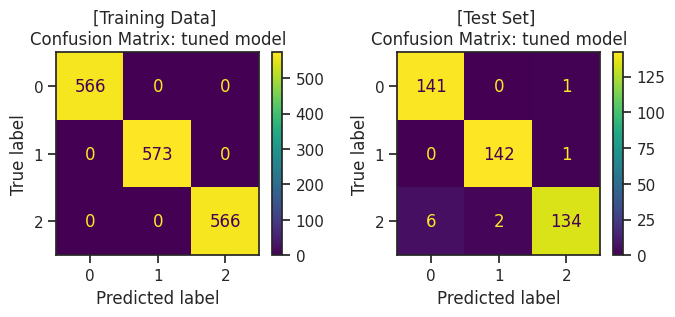

In [16]:
# สร้างโมเดล และ กำหนดช่วงค่า hyperparameters ในรูปแบบ dictionary
base_clf = LogisticRegression()
clf_params = {'solver': ['liblinear'],
              'C': [0.01, 0.1, 1],
              'penalty': ['l2']
              }
tuned_logit, accuracy_logit, cm_train_logit, cm_test_logit = tune_train_test_pipeline(base_clf, clf_params, x_train, y_train, x_test, y_test)

### Support Vector Machine (SVM)

Best hyperparameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.96
Training Set: Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       573
           2       1.00      1.00      1.00       566

    accuracy                           1.00      1705
   macro avg       1.00      1.00      1.00      1705
weighted avg       1.00      1.00      1.00      1705


Test Set: Classification report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       142
           1       0.99      1.00      0.99       143
           2       0.99      0.92      0.95       142

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



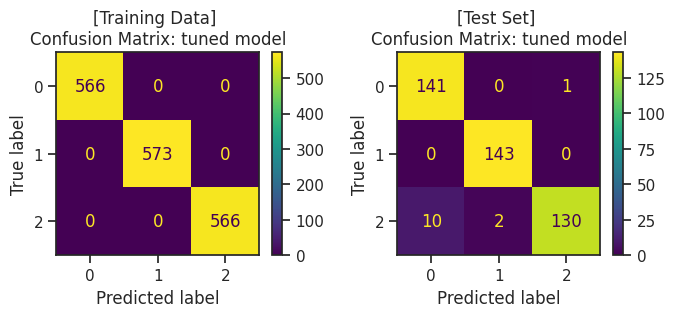

In [17]:
# สร้างโมเดล และ กำหนดช่วงค่า hyperparameters ในรูปแบบ dictionary
base_clf = SVC(random_state=RANDOM_SEED)
clf_params = {'kernel': ['rbf','linear'],
              'C': [0.1, 1]
              }
tuned_svm, accuracy_svm, cm_train_svm, cm_test_svm = tune_train_test_pipeline(base_clf, clf_params, x_train, y_train, x_test, y_test)

### Random Forest (RF)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 100}
Best cross-validation score: 0.98
Training Set: Classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       1.00      1.00      1.00       573
           2       1.00      0.98      0.99       566

    accuracy                           0.99      1705
   macro avg       0.99      0.99      0.99      1705
weighted avg       0.99      0.99      0.99      1705


Test Set: Classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       142
           1       1.00      1.00      1.00       143
           2       1.00      0.95      0.97       142

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427



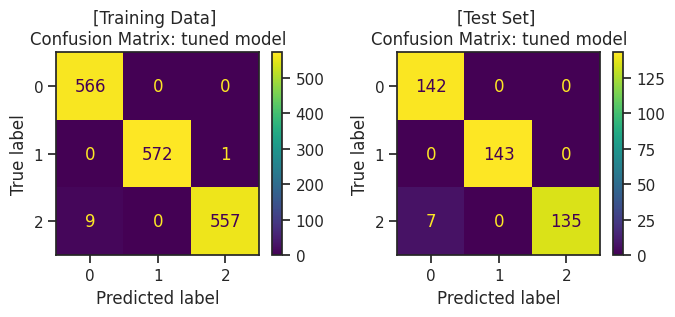

In [18]:
# สร้างโมเดล และ กำหนดช่วงค่า hyperparameters ในรูปแบบ dictionary
base_clf = RFC(random_state=RANDOM_SEED)
clf_params = {'n_estimators': [10,50,100],
              'max_depth': [3,5]
              }
tuned_rf, accuracy_rf, cm_train_rf, cm_test_rf = tune_train_test_pipeline(base_clf, clf_params, x_train, y_train, x_test, y_test)

### k-Nearest Neighbor (k-NN)

Best hyperparameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score: 0.94
Training Set: Classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       566
           1       0.98      1.00      0.99       573
           2       0.98      0.93      0.96       566

    accuracy                           0.97      1705
   macro avg       0.97      0.97      0.97      1705
weighted avg       0.97      0.97      0.97      1705


Test Set: Classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       0.94      1.00      0.97       143
           2       1.00      0.85      0.92       142

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



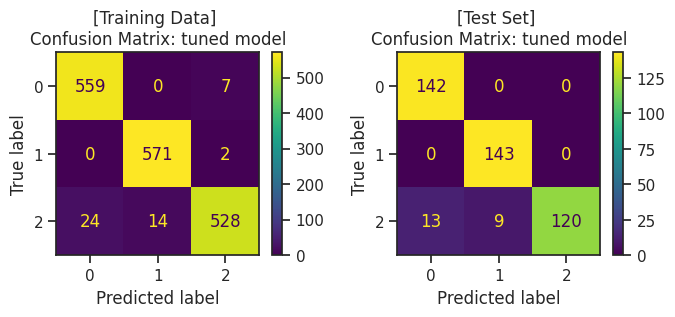

In [19]:
# สร้างโมเดล และ กำหนดช่วงค่า hyperparameters ในรูปแบบ dictionary
base_clf = KNC()
clf_params = {'weights': ['uniform','distance'],
              'n_neighbors': [3, 5, 7]
              }
tuned_knn, accuracy_knn, cm_train_knn, cm_test_knn = tune_train_test_pipeline(base_clf, clf_params, x_train, y_train, x_test, y_test)

### เปรียบเทียบ accuracy score และ confusion matrix ของแต่ละโมเดล

In [20]:
print('Accuracy Scores:')
pd.DataFrame({'Logistic':accuracy_logit, 'KNN':accuracy_knn, 'SVM':accuracy_svm, 'RF':accuracy_rf}).set_index([['train','test']], drop=True)

Accuracy Scores:


,Logistic,KNN,SVM,RF
train,1.000000,0.972434,1.000000,0.994135
test,0.976581,0.948478,0.969555,0.983607


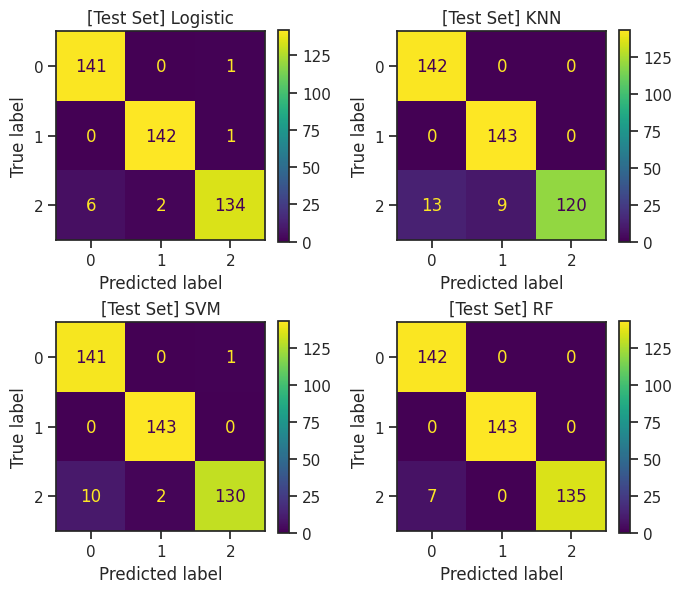

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(7, 6))
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
axs = axs.flatten()
cm = [cm_test_logit, cm_test_knn, cm_test_svm, cm_test_rf]
model_name = ['Logistic', 'KNN', 'SVM', 'RF']
for i in range(4):
    display = ConfusionMatrixDisplay(confusion_matrix=cm[i])
    ax=axs[i]
    display.plot(ax=ax)
    ax.set_title('[Test Set] '+model_name[i])
plt.tight_layout()
plt.show()

## Model selection

จาก 4 โมเดลของ supervised machine learning เราพบว่า Random Forest Classifier มี accuracy สูงสุด โดยยังมีเพียงความสับสนในการทำนายการแบ่งกลุ่มอารมณ์ 'NEGATIVE'(0) และ 'POSITIVE'(2) เพียงเล็กน้อยเมื่อเทียบกับเทคนิคอื่น

# Extra Task
- จะเห็นว่า ML pipeline ใช้เวลานาน นอกจากจะเป็นเพราะขนาดข้อมูลแล้ว จำนวน feature ก็เป็นอีก 1 ปัจจัยที่สำคัญ เพื่อให้เราสามารถลด computation time ลง เราสามารถคัดเลือกหรือแปลง features เพื่อลดจำนวน feature ลง โดยยังคง accuracy ของโมเดลที่พัฒนาขึ้นได้หรือไม่